In [212]:
# Ignoring sklearn's convergence warnings
import warnings
def warn(*args, **kwargs):
  pass
warnings.warn = warn

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Model Import
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Metrics import
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    roc_auc_score
)

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data after fitting through kfold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

########### Functions ##########
def kfold_fit(model):
  '''
  Fitting a model with data implement k-fold cross validation(k = 10)
  '''
  scores = []
  kfold = KFold(n_splits = 10, shuffle = False)

  for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(X_train_fold, y_train_fold)
    scores.append(dtc.score(X_test_fold, y_test_fold))

def output(model):
  '''
  Output different metrics to evaluate the performance of the model
  '''
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  print('Train confusion matrix: ', confusion_matrix(y_pred_train, y_train))
  print('Test confusion matrix: ', confusion_matrix(y_pred_test, y_test))

  print('Train accuracy: ', accuracy_score(y_pred_train, y_train))
  print('Test accuracy: ', accuracy_score(y_pred_test, y_test))

  print('Train precision: ', precision_score(y_pred_train, y_train, average = 'weighted'))
  print('Test precision: ', precision_score(y_pred_test, y_test, average = 'weighted'))

  print('Train recall: ', recall_score(y_pred_train, y_train, average = 'weighted'))
  print('Test recall: ', recall_score(y_pred_test, y_test, average = 'weighted'))

  print('Train f1_score: ', f1_score(y_pred_train, y_train, average = 'weighted'))
  print('Test f1_score: ', f1_score(y_pred_test, y_test, average = 'weighted'))

def roc_plot(model):
  '''
  Plotting the roc curve and calculate the auc of the model
  '''
  y_pred_train_proba = model.predict_proba(X_train)
  y_pred_test_proba = model.predict_proba(X_test)

  fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_pred_train_proba[:, 1])
  fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_pred_test_proba[:, 1])
  roc_auc_train = auc(fpr_train, tpr_train)
  roc_auc_test = auc(fpr_test, tpr_test)

  f, ax = plt.subplots(1, 2)
  f.set_size_inches(10, 5)
  ax[0].set_title('ROC Curve for Train data')
  ax[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
  ax[0].plot([0, 1], [0, 1], 'r--')
  ax[0].legend(loc = 'lower right')
  ax[0].axis(xmin = 0, xmax = 1)
  ax[0].axis(ymin = 0, ymax = 1)
  ax[0].set_xlabel('False Positive Rate')
  ax[0].set_ylabel('True Positive Rate')

  ax[1].set_title('ROC Curve for Test data')
  ax[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
  ax[1].plot([0, 1], [0, 1], 'r--')
  ax[1].legend(loc = 'lower right')
  ax[1].axis(xmin = 0, xmax = 1)
  ax[1].axis(ymin = 0, ymax = 1)
  ax[1].set_xlabel('False Positive Rate')
  ax[1].set_ylabel('True Positive Rate')

  plt.show()

################################


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Train confusion matrix:  [[182   0]
 [  4 269]]
Test confusion matrix:  [[24  0]
 [ 2 88]]
Train accuracy:  0.9912087912087912
Test accuracy:  0.9824561403508771
Train precision:  0.9913978494623656
Test precision:  0.9838056680161944
Train recall:  0.9912087912087912
Test recall:  0.9824561403508771
Train f1_score:  0.9912241296326006
Test f1_score:  0.9827084565345949


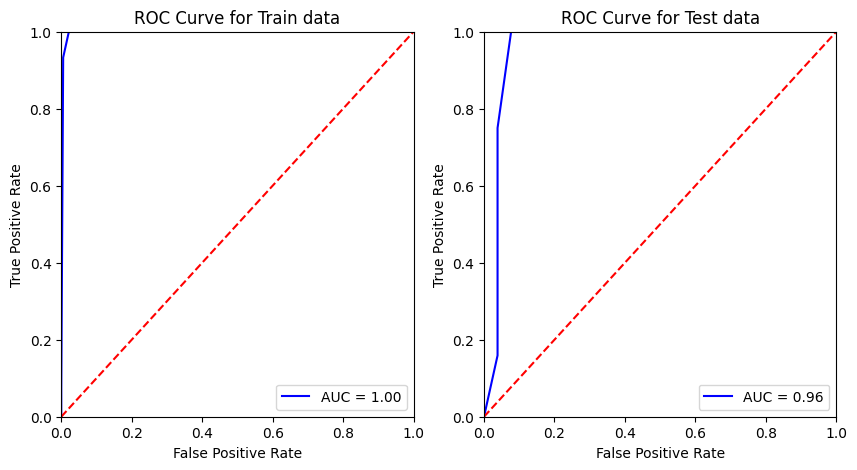

In [213]:
# Decision Tree Classifier classification
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)

kfold_fit(dtc)
output(dtc)
roc_plot(dtc)

Train confusion matrix:  [[172   6]
 [ 14 263]]
Test confusion matrix:  [[24  5]
 [ 2 83]]
Train accuracy:  0.9560439560439561
Test accuracy:  0.9385964912280702
Train precision:  0.9569751909360975
Test precision:  0.9380674150410993
Train recall:  0.9560439560439561
Test recall:  0.9385964912280702
Train f1_score:  0.9562049671939782
Test f1_score:  0.9374542504448194


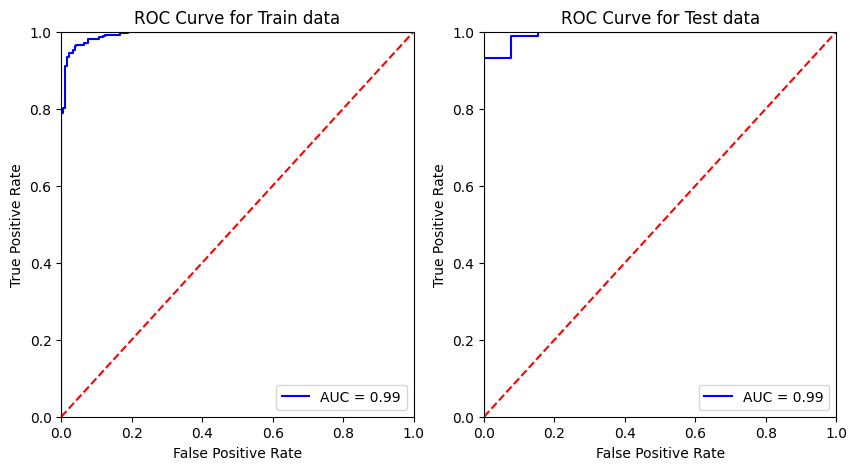

In [214]:
log_reg = LogisticRegression(random_state = 0)

kfold_fit(log_reg)
output(log_reg)
roc_plot(log_reg)


Train confusion matrix:  [[152   5]
 [ 34 264]]
Test confusion matrix:  [[23  3]
 [ 3 85]]
Train accuracy:  0.9142857142857143
Test accuracy:  0.9473684210526315
Train precision:  0.9247517402452048
Test precision:  0.9473684210526315
Train recall:  0.9142857142857143
Test recall:  0.9473684210526315
Train f1_score:  0.9157172165918522
Test f1_score:  0.9473684210526315


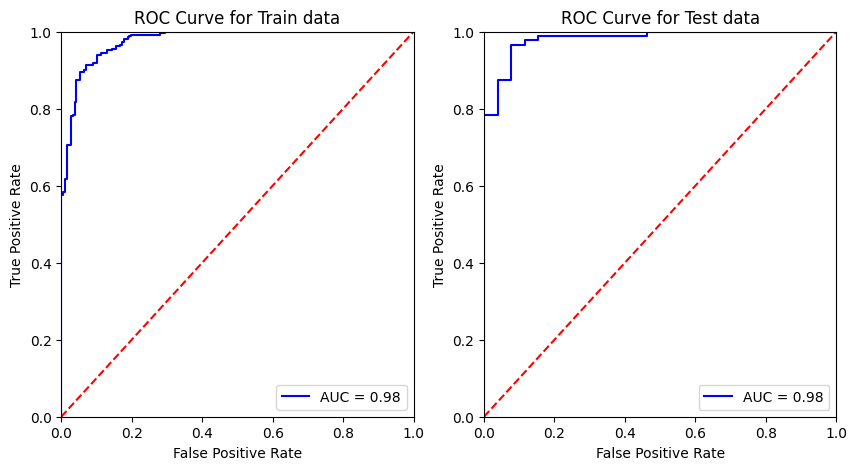

In [215]:
svc = svm.SVC(probability = True)

kfold_fit(svc)
output(svc)
roc_plot(svc)